In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_classes=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,n_features=2,hypercube=False,random_state=41,class_sep=10)

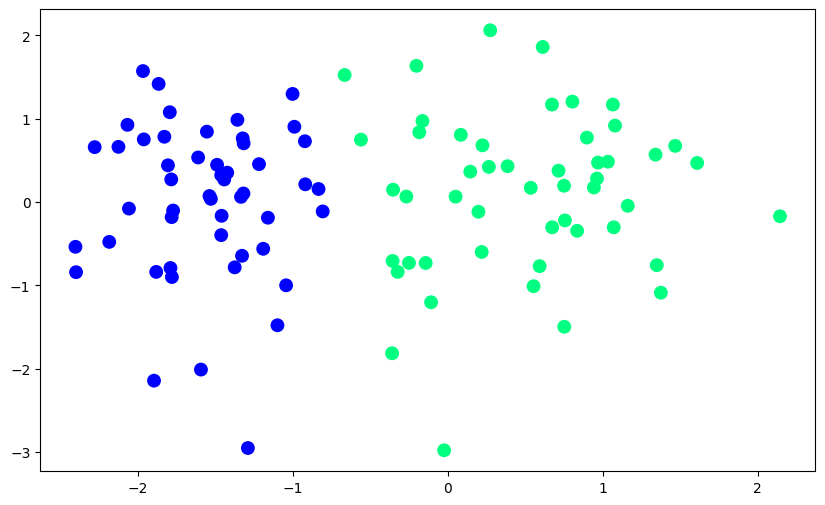

In [3]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap ="winter",s=80)

In [4]:
##imports
import numpy as np
import random

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [6]:
import math

In [7]:
class Perceptron:
    def __init__(self):
        self._intercept=None
        self._coef = None

    def sigmoid(self,z):
        y = (1/(1+(math.e)**(-z)))
        #  print(y)
        return y
    def improve(self,w,X,y,j,z):
        lr=0.1
        for i in range(len(w)):
            w[i] = w[i] + lr*((y[j]-self.sigmoid(z))*X[j][i])
        return w
  
    def fit(self,X,y):
        weights = np.ones(X.shape[1]+1)
        X= np.insert(X,0,1,axis=1)
        for i in range(100):
            for j in range(X.shape[0]):
                z = np.dot(weights,X[j])
                weights = self.improve(weights,X,y,j,z)
        self._intercept = weights[0]
        self._coef = weights[1:]
        
            
        
p =Perceptron()
p.fit(X,y)

In [8]:
weights = p._coef
weights=np.insert(weights,0,p._intercept)
weights


array([5.97712206, 9.03515893, 0.47226802])

In [9]:
m = -p._coef[0]/p._coef[1]
b = -p._intercept/p._coef[1]
x_input = np.linspace(-3,3,100)
y_input = m*x_input +b

In [10]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
model = lr.fit(X,y)

In [11]:
weights2 = model.coef_
weights2=np.insert(weights2,0,model.intercept_)
weights2


array([2.25106636, 3.50144121, 0.02773483])

In [12]:
m2 = -model.coef_[0][0]/model.coef_[0][1]
b2 = -model.intercept_[0]/model.coef_[0][1]
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input +b2

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17320\2691379632.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(-3.0, 2.0)

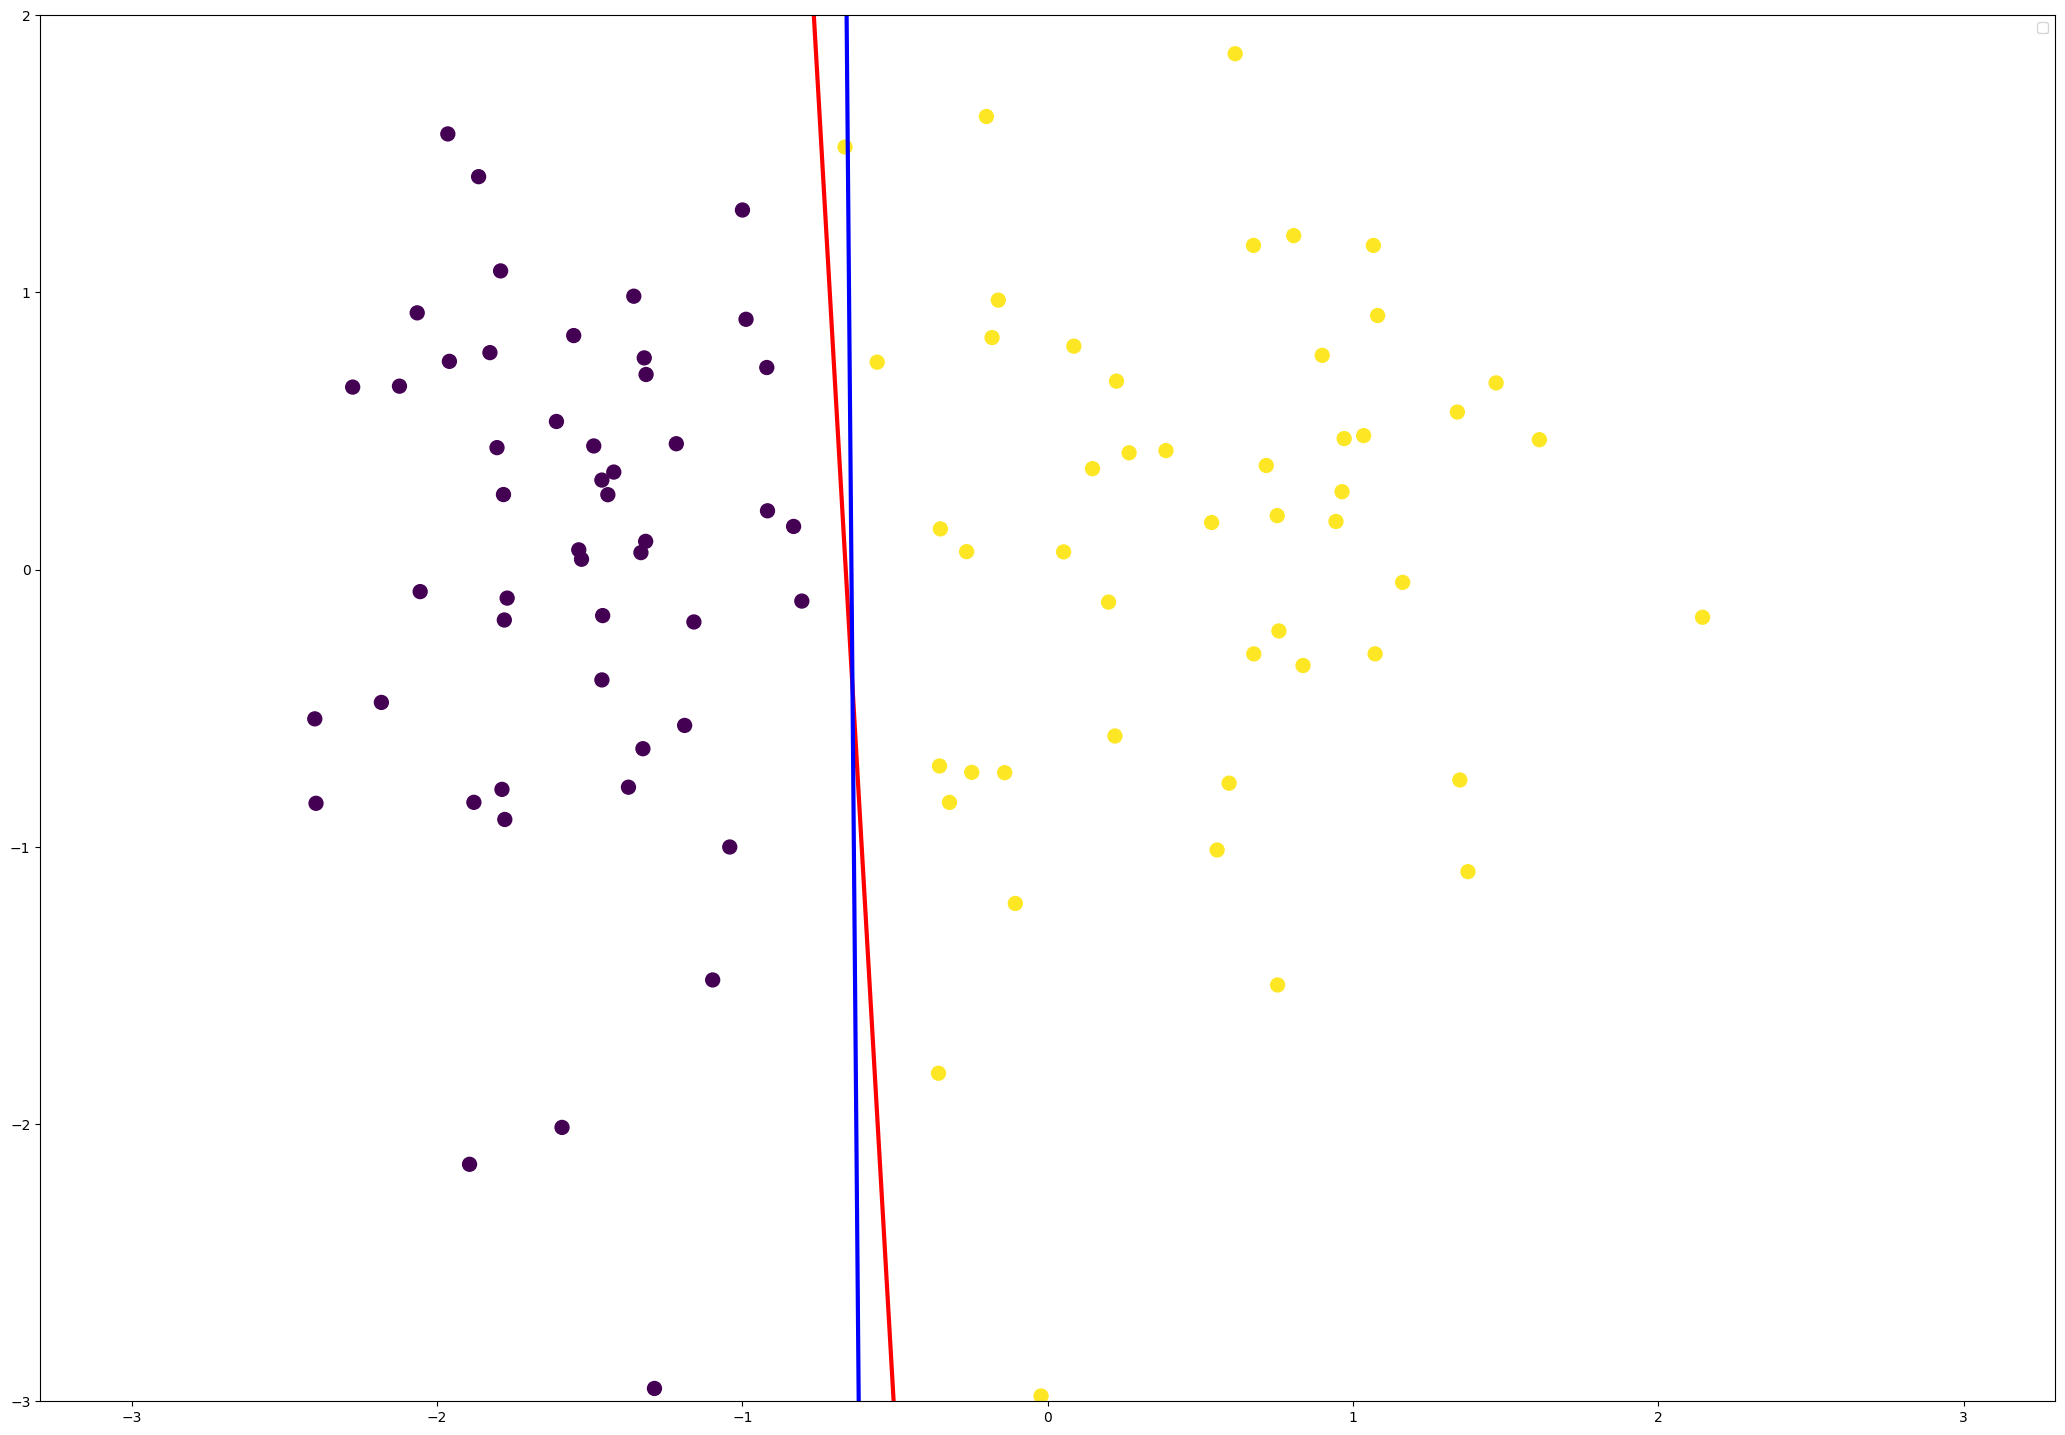

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,18))
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.plot(x_input,y_input,color="red",linewidth =3)
plt.plot(x_input2,y_input2,color="blue",linewidth =3)
plt.ylim(-3,2)